# Notebook de testes para o Kaggle Churn Challenge 2020

https://www.kaggle.com/c/labdata-churn-challenge-2020/overview

## Problema:
O objetivo desta análise consiste em prever a probabilidade de churn dos clientes de uma empresa de telecomunicações, isto é, a probabilidade de o cliente deixar de ser cliente.

Importação de bibliotecas e configuração do ambiente

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 72)

## Importação dos dados

In [2]:
dados = pd.read_csv('https://raw.githubusercontent.com/f78rocha/kaggle_churn_challenge_2020/main/train.csv',sep=',')

In [3]:
dados = dados.rename(columns={
    'id':'id',
    'gender':'Genero',
    'SeniorCitizen':'Idoso',
    'Partner':'TemParceiro',
    'Dependents':'TemDependentes',
    'tenure':'MesesNaCompanhia',
    'PhoneService':'TemTelefone',
    'MultipleLines':'MaisLinhas',
    'InternetService':'TemInternet',
    'OnlineSecurity':'ServicoSegurancaOnline',
    'OnlineBackup':'ServicoBackupOnline',
    'DeviceProtection':'ServicoProtecaoOnline',
    'TechSupport':'ServicoSuporteOnline',
    'StreamingTV':'ServicoTV',
    'StreamingMovies':'ServicoPctFilmes',
    'Contract':'Contrato',
    'PaperlessBilling':'ContaOnline',
    'PaymentMethod':'MetodoPagamento',
    'MonthlyCharges':'CobrancaMensal',
    'TotalCharges':'CobrancaTotal',
    'Churn':'Churn'
})

# Análise Exploratória de Dados (EDA)

In [4]:
# Cabeçalho
dados.head(10).T

,0,1,2,3,4,5,6,7,8,9
id,4030,6731,6479,6861,3266,6368,5830,4476,1508,2921
Genero,Female,Male,Female,Female,Male,Male,Male,Female,Male,Female
Idoso,0,0,0,0,0,0,0,0,0,0
TemParceiro,No,Yes,Yes,No,Yes,No,Yes,No,No,Yes
TemDependentes,No,Yes,No,No,Yes,No,Yes,No,No,No
MesesNaCompanhia,56.00,NaN,60.00,37.00,29.00,70.00,31.00,3.00,54.00,72.00
TemTelefone,No,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes
MaisLinhas,No phone service,No,Yes,Yes,No,No phone service,No phone service,No,No,No
TemInternet,DSL,No,Fiber optic,Fiber optic,Fiber optic,DSL,DSL,No,No,DSL
ServicoSegurancaOnline,Yes,No internet service,No,No,No,Yes,Yes,No internet service,No internet service,Yes


In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
id                        5634 non-null int64
Genero                    5634 non-null object
Idoso                     5634 non-null int64
TemParceiro               5634 non-null object
TemDependentes            5416 non-null object
MesesNaCompanhia          5173 non-null float64
TemTelefone               5634 non-null object
MaisLinhas                5634 non-null object
TemInternet               5634 non-null object
ServicoSegurancaOnline    5634 non-null object
ServicoBackupOnline       5634 non-null object
ServicoProtecaoOnline     5634 non-null object
ServicoSuporteOnline      5634 non-null object
ServicoTV                 5634 non-null object
ServicoPctFilmes          5634 non-null object
Contrato                  5634 non-null object
ContaOnline               5634 non-null object
MetodoPagamento           5535 non-null object
CobrancaMensal            5634 non-null float64


In [6]:
quantitativas = dados[['MesesNaCompanhia','CobrancaMensal','CobrancaTotal']]
categoricas = dados.drop(columns=['id','MesesNaCompanhia','CobrancaMensal','CobrancaTotal'],
                         axis=1)
#target = dados['Churn']

In [7]:
quantitativas.head(10).T

,0,1,2,3,4,5,6,7,8,9
MesesNaCompanhia,56.00,NaN,60.00,37.00,29.00,70.00,31.00,3.00,54.00,72.00
CobrancaMensal,45.05,19.65,110.80,101.90,70.75,48.40,59.95,19.55,19.65,85.10
CobrancaTotal,2560.1,332.65,6640.7,3545.35,1974.8,3442.8,1848.8,61.05,1008.7,6155.4


In [8]:
categoricas.head(10).T

,0,1,2,3,4,5,6,7,8,9
Genero,Female,Male,Female,Female,Male,Male,Male,Female,Male,Female
Idoso,0,0,0,0,0,0,0,0,0,0
TemParceiro,No,Yes,Yes,No,Yes,No,Yes,No,No,Yes
TemDependentes,No,Yes,No,No,Yes,No,Yes,No,No,No
TemTelefone,No,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes
MaisLinhas,No phone service,No,Yes,Yes,No,No phone service,No phone service,No,No,No
TemInternet,DSL,No,Fiber optic,Fiber optic,Fiber optic,DSL,DSL,No,No,DSL
ServicoSegurancaOnline,Yes,No internet service,No,No,No,Yes,Yes,No internet service,No internet service,Yes
ServicoBackupOnline,Yes,No internet service,Yes,Yes,No,No,No,No internet service,No internet service,Yes
ServicoProtecaoOnline,Yes,No internet service,Yes,Yes,No,Yes,Yes,No internet service,No internet service,Yes


## Pre-processing

### Pré-processamento das variáveis quantitativas

In [9]:
quantitativas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 3 columns):
MesesNaCompanhia    5173 non-null float64
CobrancaMensal      5634 non-null float64
CobrancaTotal       5634 non-null object
dtypes: float64(2), object(1)
memory usage: 132.1+ KB


A coluna CobrancaTotal está no formato object, embora seja numérica. Para convertê-la para o formato correto:

In [10]:
quantitativas['CobrancaTotal'] = pd.to_numeric(quantitativas['CobrancaTotal'], errors = 'coerce')
quantitativas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 3 columns):
MesesNaCompanhia    5173 non-null float64
CobrancaMensal      5634 non-null float64
CobrancaTotal       5626 non-null float64
dtypes: float64(3)
memory usage: 132.1 KB


D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
# Verificando missing values:
quantitativas.isnull().sum()

MesesNaCompanhia    461
CobrancaMensal        0
CobrancaTotal         8
dtype: int64

In [12]:
# Verificando valores zerados em cada coluna:
quantitativas[quantitativas['MesesNaCompanhia'] == 0]

,MesesNaCompanhia,CobrancaMensal,CobrancaTotal
161,0.00,61.90,nan
416,0.00,19.70,nan
1766,0.00,73.35,nan
2145,0.00,80.85,nan
3375,0.00,25.35,nan
3404,0.00,25.75,nan
4008,0.00,19.85,nan
5151,0.00,56.05,nan


In [13]:
quantitativas[quantitativas['CobrancaMensal'] == 0]

,MesesNaCompanhia,CobrancaMensal,CobrancaTotal


In [14]:
quantitativas[quantitativas['CobrancaTotal'] == 0]

,MesesNaCompanhia,CobrancaMensal,CobrancaTotal


Conclusão: Há 118 NaNs na coluna MesesNaCompanhia e 3 NaNs na coluna CobrancaTotal. Além disso, os mesmos registros com  NaNs na coluna CobrancaTotal estão com zero em MesesNaCompanhia. Assumimos que os primeiros referem-se a clientes que estão na companhia a menos de um mês. Assim, os NaNs de CobrancaTotal serão imputados pela CobrancaMensal respectiva:

In [15]:
# Criar coluna 'CobrancaTotal2':
quantitativas['CobrancaTotal2'] = quantitativas['CobrancaTotal']


D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [16]:
quantitativas[quantitativas['CobrancaTotal2'].isna()]

,MesesNaCompanhia,CobrancaMensal,CobrancaTotal,CobrancaTotal2
161,0.00,61.90,nan,nan
416,0.00,19.70,nan,nan
1766,0.00,73.35,nan,nan
2145,0.00,80.85,nan,nan
3375,0.00,25.35,nan,nan
3404,0.00,25.75,nan,nan
4008,0.00,19.85,nan,nan
5151,0.00,56.05,nan,nan


In [17]:
# Preenche os NaNs de CobrancaTotal2 pelo valor respectivo de CobrancaMensal:
quantitativas['CobrancaTotal2'].fillna(quantitativas[quantitativas['CobrancaTotal'].isna()]['CobrancaMensal'], inplace = True)

D:\ANACONDA\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [18]:
# Verifica que os NaNs de CobrancaTotal foram substituídos pelos valores respectivos de CobrancaMensal na coluna CobrancaTotal2:
quantitativas[quantitativas['CobrancaTotal'].isna()]

,MesesNaCompanhia,CobrancaMensal,CobrancaTotal,CobrancaTotal2
161,0.00,61.90,nan,61.90
416,0.00,19.70,nan,19.70
1766,0.00,73.35,nan,73.35
2145,0.00,80.85,nan,80.85
3375,0.00,25.35,nan,25.35
3404,0.00,25.75,nan,25.75
4008,0.00,19.85,nan,19.85
5151,0.00,56.05,nan,56.05


In [19]:
# Novo describe:
quantitativas.describe()

,MesesNaCompanhia,CobrancaMensal,CobrancaTotal,CobrancaTotal2
count,"5,173.00","5,634.00","5,626.00","5,634.00"
mean,32.33,64.63,"2,273.51","2,270.35"
std,24.46,30.02,"2,258.38","2,258.34"
min,0.00,18.25,18.80,18.80
25%,9.00,35.46,401.59,399.30
50%,29.00,70.25,"1,396.12","1,392.92"
75%,55.00,89.80,"3,764.29","3,758.40"
max,72.00,118.75,"8,684.80","8,684.80"


Tratamento dos missing values da coluna MesesNaCompanhia:

In [20]:
# Ao dividir a cobrança total pela mensal, temos a quantidade de meses aproximados, incluída na coluna CobrancaTotalPorMensal:
quantitativas['CobrancaTotalPorMensal'] = quantitativas['CobrancaTotal2']/quantitativas['CobrancaMensal']

D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [21]:
# A diferença entre a coluna CobrancaTotalPorMensal e a MesesNaCompanhia é relativamente pequena, conforme describe e coluna Erro_Meses:
quantitativas['Erro_Meses'] = (quantitativas['CobrancaTotalPorMensal'] - quantitativas['MesesNaCompanhia'])/quantitativas['MesesNaCompanhia']
quantitativas[quantitativas['MesesNaCompanhia'].notna()].describe()

D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,MesesNaCompanhia,CobrancaMensal,CobrancaTotal,CobrancaTotal2,CobrancaTotalPorMensal,Erro_Meses
count,"5,173.00","5,173.00","5,165.00","5,173.00","5,173.00","5,173.00"
mean,32.33,64.66,"2,278.96","2,275.50",32.35,inf
std,24.46,30.05,"2,260.02","2,259.97",24.50,nan
min,0.00,18.25,18.80,18.80,1.00,-0.31
25%,9.00,35.45,403.15,401.30,8.81,-0.02
50%,29.00,70.30,"1,398.60","1,396.25",28.44,0.00
75%,55.00,89.85,"3,770.00","3,766.20",54.83,0.02
max,72.00,118.75,"8,684.80","8,684.80",79.34,inf


In [22]:
# Observe a coluna Erro_Meses, criada na célula anterior:
quantitativas[quantitativas['MesesNaCompanhia'].notna()].sum()

MesesNaCompanhia            167,258.00
CobrancaMensal              334,511.15
CobrancaTotal            11,770,815.55
CobrancaTotal2           11,771,178.35
CobrancaTotalPorMensal      167,337.22
Erro_Meses                         inf
dtype: float64

In [23]:
# Assim, criamos uma coluna para registrar os MesesNaCompanhia :

quantitativas['MesesNaCompanhia2'] = quantitativas['MesesNaCompanhia']
quantitativas

D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,MesesNaCompanhia,CobrancaMensal,CobrancaTotal,CobrancaTotal2,CobrancaTotalPorMensal,Erro_Meses,MesesNaCompanhia2
0,56.00,45.05,"2,560.10","2,560.10",56.83,0.01,56.00
1,nan,19.65,332.65,332.65,16.93,nan,nan
2,60.00,110.80,"6,640.70","6,640.70",59.93,-0.00,60.00
3,37.00,101.90,"3,545.35","3,545.35",34.79,-0.06,37.00
4,29.00,70.75,"1,974.80","1,974.80",27.91,-0.04,29.00
5,70.00,48.40,"3,442.80","3,442.80",71.13,0.02,70.00
6,31.00,59.95,"1,848.80","1,848.80",30.84,-0.01,31.00
7,3.00,19.55,61.05,61.05,3.12,0.04,3.00
8,54.00,19.65,"1,008.70","1,008.70",51.33,-0.05,54.00
9,72.00,85.10,"6,155.40","6,155.40",72.33,0.00,72.00


In [24]:
# Em seguida, preenchemos os NaNs da coluna criada com a CobrancaTotalPorMensal
quantitativas['MesesNaCompanhia2'].fillna(quantitativas['CobrancaTotalPorMensal'], inplace = True)

In [25]:
quantitativas[quantitativas['MesesNaCompanhia'].isna()]

,MesesNaCompanhia,CobrancaMensal,CobrancaTotal,CobrancaTotal2,CobrancaTotalPorMensal,Erro_Meses,MesesNaCompanhia2
1,nan,19.65,332.65,332.65,16.93,nan,16.93
11,nan,94.90,"4,422.95","4,422.95",46.61,nan,46.61
34,nan,44.70,44.70,44.70,1.00,nan,1.00
45,nan,97.80,"4,913.30","4,913.30",50.24,nan,50.24
55,nan,25.05,963.95,963.95,38.48,nan,38.48
92,nan,82.30,"5,980.55","5,980.55",72.67,nan,72.67
94,nan,70.30,132.40,132.40,1.88,nan,1.88
109,nan,61.95,"1,070.70","1,070.70",17.28,nan,17.28
121,nan,71.30,"1,389.20","1,389.20",19.48,nan,19.48
133,nan,49.40,408.25,408.25,8.26,nan,8.26


In [26]:
# Pegamos as colunas que interessam e a renomeamos
quantitativas = quantitativas[['MesesNaCompanhia2', 'CobrancaMensal', 'CobrancaTotal2']].copy()
quantitativas.columns = ['MesesNaCompanhia', 'CobrancaMensal', 'CobrancaTotal']


In [27]:
quantitativas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 3 columns):
MesesNaCompanhia    5634 non-null float64
CobrancaMensal      5634 non-null float64
CobrancaTotal       5634 non-null float64
dtypes: float64(3)
memory usage: 132.1 KB


(array([843., 448., 363., 312., 220., 235., 270., 225., 163., 210., 206.,
        202., 159., 228., 231., 204., 233., 200., 395., 287.]),
 array([ 0.        ,  3.76629779,  7.53259557, 11.29889336, 15.06519115,
        18.83148893, 22.59778672, 26.36408451, 30.13038229, 33.89668008,
        37.66297787, 41.42927565, 45.19557344, 48.96187123, 52.72816901,
        56.4944668 , 60.26076459, 64.02706237, 67.79336016, 71.55965795,
        75.32595573]),
 <a list of 20 Patch objects>)

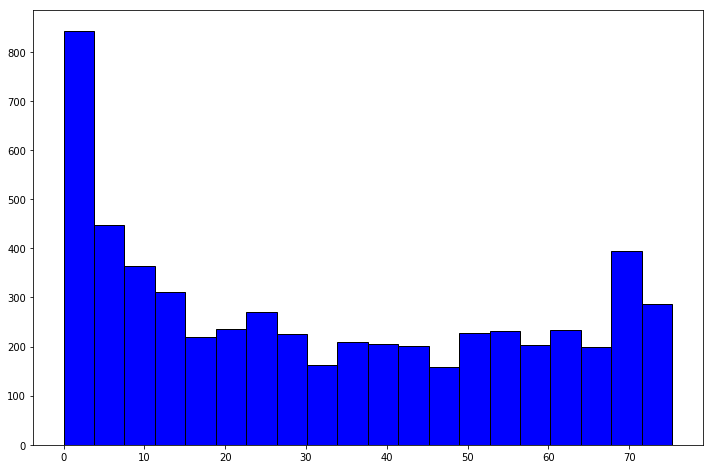

In [28]:
# Verificando o formato da distribuição:
plt.figure(figsize = (12, 8))
plt.hist(quantitativas['MesesNaCompanhia'], color = 'blue', edgecolor = 'black', bins = 20)

(array([942., 344.,  73.,  82.,  86., 204., 254., 263., 197., 179., 364.,
        370., 396., 358., 355., 331., 316., 290., 155.,  75.]),
 array([ 18.25 ,  23.275,  28.3  ,  33.325,  38.35 ,  43.375,  48.4  ,
         53.425,  58.45 ,  63.475,  68.5  ,  73.525,  78.55 ,  83.575,
         88.6  ,  93.625,  98.65 , 103.675, 108.7  , 113.725, 118.75 ]),
 <a list of 20 Patch objects>)

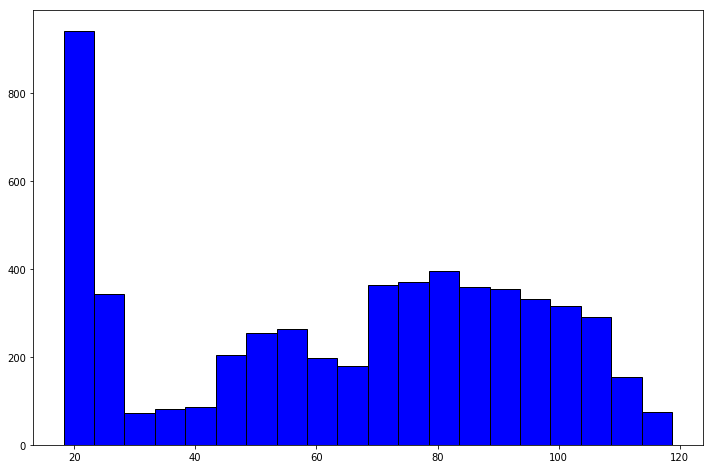

In [29]:
plt.figure(figsize = (12, 8))
plt.hist(quantitativas['CobrancaMensal'], color = 'blue', edgecolor = 'black', bins = 20)

(array([1512.,  673.,  546.,  430.,  292.,  258.,  209.,  200.,  174.,
         183.,  161.,  168.,  147.,  157.,  137.,  116.,  104.,   73.,
          64.,   30.]),
 array([  18.8,  452.1,  885.4, 1318.7, 1752. , 2185.3, 2618.6, 3051.9,
        3485.2, 3918.5, 4351.8, 4785.1, 5218.4, 5651.7, 6085. , 6518.3,
        6951.6, 7384.9, 7818.2, 8251.5, 8684.8]),
 <a list of 20 Patch objects>)

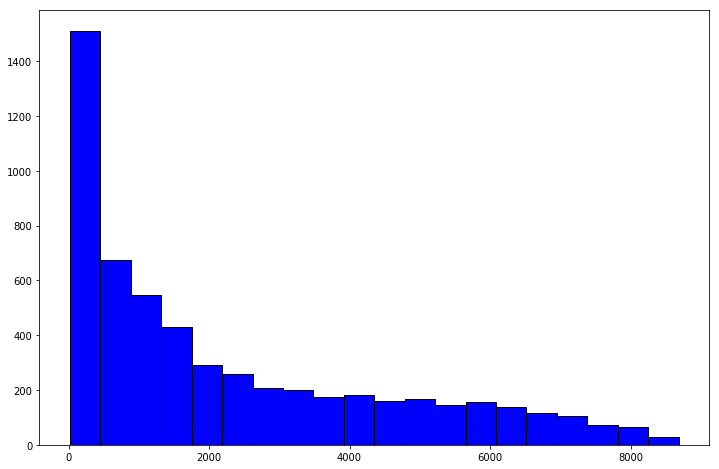

In [30]:
plt.figure(figsize = (12, 8))
plt.hist(quantitativas['CobrancaTotal'], color = 'blue', edgecolor = 'black', bins = 20)

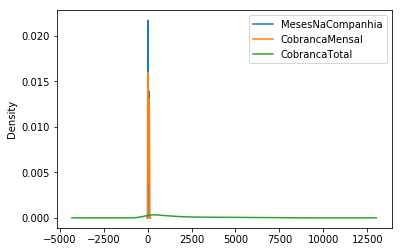

In [31]:
quantitativas.plot(kind = 'kde')

In [32]:
# 1a Transformação: StandardScaler
from sklearn.preprocessing import StandardScaler

quant_scale = StandardScaler().fit_transform(quantitativas)

In [33]:
quant_scale = pd.DataFrame(quant_scale, columns= quantitativas.columns)
quant_scale.describe()

,MesesNaCompanhia,CobrancaMensal,CobrancaTotal
count,"5,634.00","5,634.00","5,634.00"
mean,-0.00,0.00,0.00
std,1.00,1.00,1.00
min,-1.32,-1.54,-1.00
25%,-0.95,-0.97,-0.83
50%,-0.14,0.19,-0.39
75%,0.92,0.84,0.66
max,1.75,1.80,2.84


In [34]:
# 2a Transformação: MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

quant_minmax = MinMaxScaler().fit_transform(quantitativas)
quant_minmax = pd.DataFrame(quant_minmax, columns= quantitativas.columns)
quant_minmax.describe()

,MesesNaCompanhia,CobrancaMensal,CobrancaTotal
count,"5,634.00","5,634.00","5,634.00"
mean,0.43,0.46,0.26
std,0.33,0.30,0.26
min,0.00,0.00,0.00
25%,0.12,0.17,0.04
50%,0.38,0.52,0.16
75%,0.73,0.71,0.43
max,1.00,1.00,1.00


In [35]:
# 3a Transformação: RobustScaler
from sklearn.preprocessing import RobustScaler

quant_robust = RobustScaler().fit_transform(quantitativas)
quant_robust = pd.DataFrame(quant_minmax, columns= quantitativas.columns)
quant_robust.describe()

,MesesNaCompanhia,CobrancaMensal,CobrancaTotal
count,"5,634.00","5,634.00","5,634.00"
mean,0.43,0.46,0.26
std,0.33,0.30,0.26
min,0.00,0.00,0.00
25%,0.12,0.17,0.04
50%,0.38,0.52,0.16
75%,0.73,0.71,0.43
max,1.00,1.00,1.00


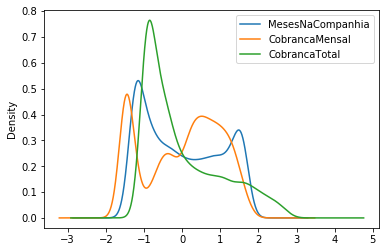

In [36]:
quant_scale.plot(kind= 'kde')

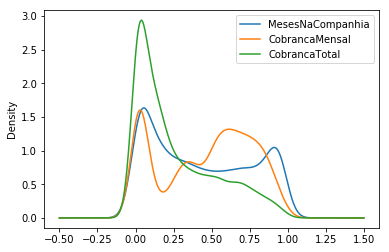

In [37]:
quant_minmax.plot(kind='kde')

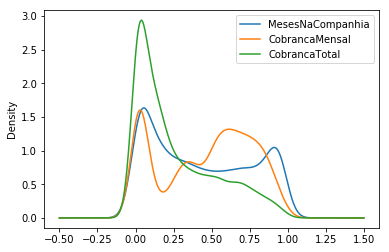

In [38]:
quant_robust.plot(kind = 'kde')

## Tratamento das variáveis categórias

In [39]:
categoricas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 17 columns):
Genero                    5634 non-null object
Idoso                     5634 non-null int64
TemParceiro               5634 non-null object
TemDependentes            5416 non-null object
TemTelefone               5634 non-null object
MaisLinhas                5634 non-null object
TemInternet               5634 non-null object
ServicoSegurancaOnline    5634 non-null object
ServicoBackupOnline       5634 non-null object
ServicoProtecaoOnline     5634 non-null object
ServicoSuporteOnline      5634 non-null object
ServicoTV                 5634 non-null object
ServicoPctFilmes          5634 non-null object
Contrato                  5634 non-null object
ContaOnline               5634 non-null object
MetodoPagamento           5535 non-null object
Churn                     5634 non-null int64
dtypes: int64(2), object(15)
memory usage: 748.3+ KB


Tratamento de valores faltantes

In [40]:
categoricas.isna().sum()

Genero                      0
Idoso                       0
TemParceiro                 0
TemDependentes            218
TemTelefone                 0
MaisLinhas                  0
TemInternet                 0
ServicoSegurancaOnline      0
ServicoBackupOnline         0
ServicoProtecaoOnline       0
ServicoSuporteOnline        0
ServicoTV                   0
ServicoPctFilmes            0
Contrato                    0
ContaOnline                 0
MetodoPagamento            99
Churn                       0
dtype: int64

In [41]:
# Criar coluna TemDependentes2 e preencher os NaNs pela moda
categoricas['TemDependentes2'] = categoricas['TemDependentes']

In [42]:
categoricas.isna().sum()

Genero                      0
Idoso                       0
TemParceiro                 0
TemDependentes            218
TemTelefone                 0
MaisLinhas                  0
TemInternet                 0
ServicoSegurancaOnline      0
ServicoBackupOnline         0
ServicoProtecaoOnline       0
ServicoSuporteOnline        0
ServicoTV                   0
ServicoPctFilmes            0
Contrato                    0
ContaOnline                 0
MetodoPagamento            99
Churn                       0
TemDependentes2           218
dtype: int64

In [43]:
categoricas['TemDependentes2'].mode()

0    No
dtype: object

In [44]:
categoricas['TemDependentes2'].fillna(value = 'No', inplace = True)
categoricas.isna().sum()

Genero                      0
Idoso                       0
TemParceiro                 0
TemDependentes            218
TemTelefone                 0
MaisLinhas                  0
TemInternet                 0
ServicoSegurancaOnline      0
ServicoBackupOnline         0
ServicoProtecaoOnline       0
ServicoSuporteOnline        0
ServicoTV                   0
ServicoPctFilmes            0
Contrato                    0
ContaOnline                 0
MetodoPagamento            99
Churn                       0
TemDependentes2             0
dtype: int64

In [45]:
# Mesmo procedimento para a variável MetodoPagamento
# Criar coluna TemDependentes2 e preencher os NaNs pela moda
categoricas['MetodoPagamento2'] = categoricas['MetodoPagamento']
categoricas.isna().sum()

Genero                      0
Idoso                       0
TemParceiro                 0
TemDependentes            218
TemTelefone                 0
MaisLinhas                  0
TemInternet                 0
ServicoSegurancaOnline      0
ServicoBackupOnline         0
ServicoProtecaoOnline       0
ServicoSuporteOnline        0
ServicoTV                   0
ServicoPctFilmes            0
Contrato                    0
ContaOnline                 0
MetodoPagamento            99
Churn                       0
TemDependentes2             0
MetodoPagamento2           99
dtype: int64

In [46]:
categoricas['MetodoPagamento2'].value_counts()

Electronic check             1887
Mailed check                 1272
Bank transfer (automatic)    1212
Credit card (automatic)      1164
Name: MetodoPagamento2, dtype: int64

In [47]:
categoricas['MetodoPagamento2'].fillna(value = 'Electronic check', inplace = True)
categoricas.isna().sum()

Genero                      0
Idoso                       0
TemParceiro                 0
TemDependentes            218
TemTelefone                 0
MaisLinhas                  0
TemInternet                 0
ServicoSegurancaOnline      0
ServicoBackupOnline         0
ServicoProtecaoOnline       0
ServicoSuporteOnline        0
ServicoTV                   0
ServicoPctFilmes            0
Contrato                    0
ContaOnline                 0
MetodoPagamento            99
Churn                       0
TemDependentes2             0
MetodoPagamento2            0
dtype: int64

In [48]:
# Apaga as columnas TemDependentes e MetodoPagamento originais e renomeia TemDependentes2 e MetodoPagamento2:
categoricas.drop(columns = ['MetodoPagamento', 'TemDependentes'])
categoricas.columns = ['Genero', 'Idoso', 'TemParceiro', 'TemDependentes', 'TemTelefone',
       'MaisLinhas', 'TemInternet', 'ServicoSegurancaOnline',
       'ServicoBackupOnline', 'ServicoProtecaoOnline', 'ServicoSuporteOnline',
       'ServicoTV', 'ServicoPctFilmes', 'Contrato', 'ContaOnline',
       'MetodoPagamento', 'TemDependentes', 'MetodoPagamento']

ValueError: Length mismatch: Expected axis has 19 elements, new values have 18 elements

In [ ]:
categoricas.info()

In [ ]:
# Cria variáveis dummies
dummies = pd.get_dummies(categoricas, drop_first= True)
dummies.head().T

## Criação dos datasets X e y

In [ ]:
train_tratado = pd.concat([quantitativas, dummies], axis =1)
train_tratado

In [ ]:
test_tratado.to_csv('train_tratado.csv', index = False)

Melhores resultados:

1. Transformação Robust


Próximas tentativas:

1. Fazer binning das variáveis quantitativas